In [1]:
# import the packages

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score,recall_score,f1_score,accuracy_score

In [2]:
# read the dataset
data = pd.read_csv("bank_customer.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Explanatory analysis 
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

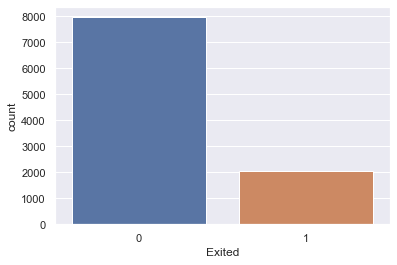

In [6]:
# count polt for exited
sns.countplot("Exited",data=data)

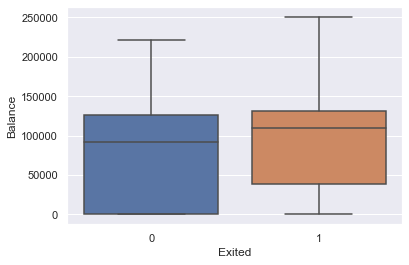

In [7]:
# box plot for the "Exited" and "Balance"
sns.boxplot(x="Exited", y="Balance", data=data)

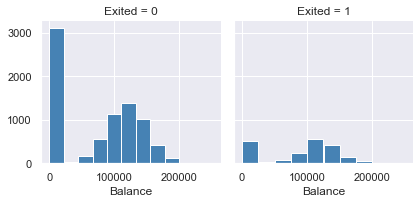

In [8]:
# Facet Grid
g = sns.FacetGrid(data, col="Exited", margin_titles=True)
g.map(plt.hist, "Balance", color="steelblue")

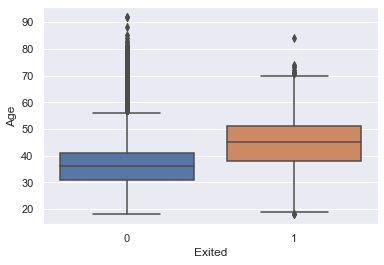

In [9]:
# Box plot for "Exited" and "Age"
sns.boxplot(x="Exited", y="Age", data=data)

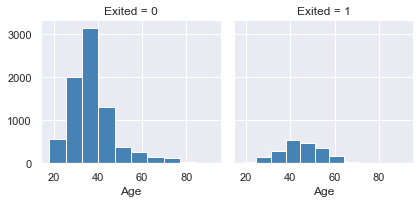

In [10]:
g = sns.FacetGrid(data, col="Exited", margin_titles=True)
g.map(plt.hist, "Age", color="steelblue")

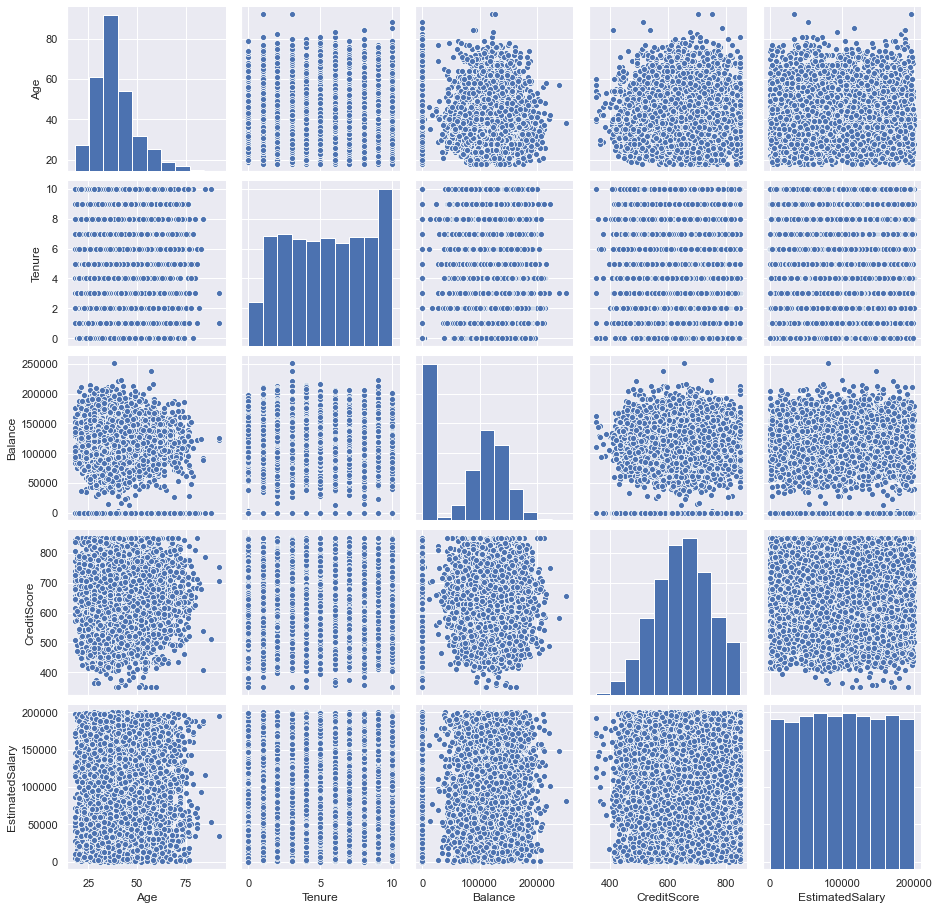

In [11]:
sns.pairplot(data[["Age", "Tenure", "Balance", "CreditScore", "EstimatedSalary"]])

In [12]:
# Found 3 unique values for the "Geography"
data["Geography"].describe() 

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [13]:
# Found 2 unique values for the "Gender"
data["Gender"].describe()

count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object

In [14]:
# Preprocessing

# split the data and target
X = data.drop("Exited",axis = 1)
y = data["Exited"]
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
# split the training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)

In [16]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [17]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [18]:
# different attributes 
quantitives = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
bi_col = ["Gender"]
labels_col = ["Geography"]
# drop the columns are not important for the prediction
to_drop = ["RowNumber", "CustomerId", "Surname"]

In [19]:
# different prepocessing pipline according the type of the cloumns
quanti_refiner = Pipeline(
    steps=[
        ("imputation",SimpleImputer(strategy="median")),
        ("scale",StandardScaler())                              
    ]
)
bi_col_refiner = Pipeline(
    steps=[
        ("imputation",SimpleImputer(strategy="most_frequent")),
        ("onehot_encoder",OneHotEncoder(drop="first", categories="auto"))                
    ]
)

labels_col_refiner = Pipeline(
    steps=[
        ("imputation",SimpleImputer(strategy="most_frequent")),
        ("label_encoder",OrdinalEncoder())                
    ]
)

preprocessed = ColumnTransformer(
    remainder = "passthrough",
    transformers = [
        ("quanti_refined", quanti_refiner, quantitives),
        ("bi_col_refined", bi_col_refiner, bi_col),
        ("labels_col_refined", labels_col_refiner, labels_col),
        ("dropped", "drop", to_drop)
    ]
)

In [20]:
# Classification

# KNN
knn_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("KNN", KNeighborsClassifier())                
    ]
)
hyper_params = {
    "KNN__n_neighbors": [2,3,4,5],
    "KNN__p": [2,3,4],
    "KNN__weights":["uniform","distance"]
}

In [21]:
# using grid serach for find the best parameters 
optimal_knn = GridSearchCV(knn_pipeline, hyper_params, cv=5)

In [22]:
# fit the data 
optimal_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                            

In [23]:
optimal_knn.best_params_

{'KNN__n_neighbors': 4, 'KNN__p': 4, 'KNN__weights': 'uniform'}

In [24]:
# score on training set
optimal_knn.score(X_train,y_train)

0.876875

In [25]:
# score on test set
optimal_knn.score(X_test,y_test)

0.844

In [26]:
y_pred_knn = optimal_knn.predict(X_test)

In [27]:
precision_score(y_test, y_pred_knn)

0.7435897435897436

In [28]:
# recall value
recall_score(y_test, y_pred_knn)

0.35626535626535627

In [29]:
f1_score(y_test, y_pred_knn)

0.4817275747508305

In [30]:
# confusion matrix 
confusion_matrix(y_test, y_pred_knn)

array([[1543,   50],
       [ 262,  145]])

In [31]:
optimal_knn2 = GridSearchCV(knn_pipeline, hyper_params, cv=5, scoring="recall")

In [32]:
optimal_knn2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                            

In [33]:
optimal_knn2.best_params_

{'KNN__n_neighbors': 2, 'KNN__p': 3, 'KNN__weights': 'distance'}

In [34]:
# SVM

svm_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("LSVC", LinearSVC())                
    ]
)
svc_hyper_params = {
    "LSVC__C": [1,10,100,10000,100000]
}

optimal_svm = GridSearchCV(svm_pipeline, svc_hyper_params, cv=5, scoring="recall")
optimal_svm.fit(X_train, y_train)

/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/Caskroom/minicond

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                            

In [35]:
print(f"Best parameters: {optimal_svm.best_params_}")
print(f"Training set score: {optimal_svm.score(X_train, y_train)}")
print(f"Test set score: {optimal_svm.score(X_test,y_test)}")
y_pred_svm = optimal_svm.predict(X_test)
print(f"Precision score: {precision_score(y_test, y_pred_svm)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_svm)}")
print(f"Recall score: {recall_score(y_test, y_pred_svm)}")
print(f"F1 score: {f1_score(y_test, y_pred_svm)}")
print(f"Confusion matrix: {confusion_matrix(y_test, y_pred_svm)}")

Best parameters: {'LSVC__C': 10000}
Training set score: 0.39631901840490796
Test set score: 0.36363636363636365
Precision score: 0.2890625
Accuracy score: 0.6885
Recall score: 0.36363636363636365
F1 score: 0.3220892274211099
Confusion matrix: [[1229  364]
 [ 259  148]]


In [36]:
# LDA
lda_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("LDA", LinearDiscriminantAnalysis())              
    ]
)
lda_hyper_params = {
    "LDA__solver": ["svd","lsqr","eigen"]
}
optimal_lda = GridSearchCV(lda_pipeline, lda_hyper_params, cv=5, scoring="recall")
optimal_lda.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                            

In [37]:
print(f"Best parameters: {optimal_lda.best_params_}")
print(f"Training set score: {optimal_lda.score(X_train, y_train)}")
print(f"Test set score: {optimal_lda.score(X_test,y_test)}")
y_pred_lda = optimal_lda.predict(X_test)
print(f"Precision score: {precision_score(y_test, y_pred_lda)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_lda)}")
print(f"Recall score: {recall_score(y_test, y_pred_lda)}")
print(f"F1 score: {f1_score(y_test, y_pred_lda)}")
print(f"Confusion matrix: {confusion_matrix(y_test, y_pred_lda)}")

Best parameters: {'LDA__solver': 'svd'}
Training set score: 0.19938650306748465
Test set score: 0.20393120393120392
Precision score: 0.535483870967742
Accuracy score: 0.802
Recall score: 0.20393120393120392
F1 score: 0.29537366548042704
Confusion matrix: [[1521   72]
 [ 324   83]]


In [38]:
tree_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("decisiontree", DecisionTreeClassifier(random_state=0))
    ]
)
tree_hyper_params = {
    "decisiontree__criterion": ['gini', 'entropy'],
    "decisiontree__max_depth": [1,5,10],
    "decisiontree__min_samples_split": range(2,3),
    "decisiontree__min_samples_leaf": range(1,3)
}
optimal_tree = GridSearchCV(tree_pipeline, tree_hyper_params, cv=5, scoring="recall")
optimal_tree.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                            

In [39]:
print(f"Best parameters: {optimal_tree.best_params_}")
print(f"Training set score: {optimal_tree.score(X_train, y_train)}")
print(f"Test set score: {optimal_tree.score(X_test,y_test)}")
y_pred_svm = optimal_tree.predict(X_test)
print(f"Precision score: {precision_score(y_test, y_pred_svm)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_svm)}")
print(f"Recall score: {recall_score(y_test, y_pred_svm)}")
print(f"F1 score: {f1_score(y_test, y_pred_svm)}")
print(f"Confusion matrix: {confusion_matrix(y_test, y_pred_svm)}")

Best parameters: {'decisiontree__criterion': 'entropy', 'decisiontree__max_depth': 10, 'decisiontree__min_samples_leaf': 1, 'decisiontree__min_samples_split': 2}
Training set score: 0.6067484662576688
Test set score: 0.4594594594594595
Precision score: 0.6678571428571428
Accuracy score: 0.8435
Recall score: 0.4594594594594595
F1 score: 0.5443959243085881
Confusion matrix: [[1500   93]
 [ 220  187]]


In [40]:
lr_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("lr",  LogisticRegression())
    ]
)
lr_hyper_params = {
    'lr__penalty' : ['l1', 'l2'],
    'lr__C': np.logspace(-4, 4, 20),
}
optimal_lr = GridSearchCV(lr_pipeline, lr_hyper_params, cv=5, scoring="recall")
optimal_lr.fit(X_train, y_train)

/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/Caskroom/miniconda/base/envs/env_he_jiang/lib/python3.6/site-packages/sklearn/linear_m

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                            

In [41]:
print(f"Best parameters: {optimal_lr.best_params_}")
print(f"Training set score: {optimal_lr.score(X_train, y_train)}")
print(f"Test set score: {optimal_lr.score(X_test,y_test)}")
y_pred_lr = optimal_lr.predict(X_test)
print(f"Precision score: {precision_score(y_test, y_pred_lr)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_lr)}")
print(f"Recall score: {recall_score(y_test, y_pred_lr)}")
print(f"F1 score: {f1_score(y_test, y_pred_lr)}")
print(f"Confusion matrix: {confusion_matrix(y_test, y_pred_lr)}")

Best parameters: {'lr__C': 29.763514416313132, 'lr__penalty': 'l2'}
Training set score: 0.18159509202453988
Test set score: 0.19164619164619165
Precision score: 0.5531914893617021
Accuracy score: 0.804
Recall score: 0.19164619164619165
F1 score: 0.2846715328467153
Confusion matrix: [[1530   63]
 [ 329   78]]


In [42]:
# all requirements are done, need to be relaunched 